<a href="https://colab.research.google.com/github/Cado87/Fruit-classification/blob/main/Fruit_classifier_dataset_DeepFruit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import requests

url = "https://prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com/5prc54r4rt-1.zip"
response = requests.get(url, headers=headers)

# Save the downloaded content to a file
with open("dataset.zip", "wb") as f:
    f.write(response.content)

In [5]:
import zipfile
import os

# Specify the path to the downloaded zip file
zip_file_path = "dataset.zip"

# Specify the directory where you want to extract the contents
extract_dir = "extracted_dataset"

# Create the extraction directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Open the zip file and extract its contents
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"File '{zip_file_path}' unzipped to '{extract_dir}'")

File 'dataset.zip' unzipped to 'extracted_dataset'


In [6]:
import os

directory_path = "/content/extracted_dataset/DeepFruits Dataset of Fruits Images with different combinations for Fruit Recognition and Calories Estimation/Fruits_Dataset_Test"

# List all entries in the directory
all_entries = os.listdir(directory_path)

# Filter for directories (optional, if you only want to show directories)
folders = [entry for entry in all_entries if os.path.isdir(os.path.join(directory_path, entry))]

# Display the first 10 folder names
print("First 10 folders:")
for i, folder_name in enumerate(folders[:10]):
    print(folder_name)

First 10 folders:
7
5
1
2
8
6
3
4


# Task
Display 10 image files from a folder within "/content/extracted_dataset/DeepFruits Dataset of Fruits Images with different combinations for Fruit Recognition and Calories Estimation/Fruits_Dataset_Test".

## Choose a folder

### Subtask:
Select one of the folders to display images from.


**Reasoning**:
Choose a folder name and construct the full path to the selected folder.



In [7]:
selected_folder_name = "7"
selected_folder_path = os.path.join(directory_path, selected_folder_name)
print(f"Selected folder path: {selected_folder_path}")

Selected folder path: /content/extracted_dataset/DeepFruits Dataset of Fruits Images with different combinations for Fruit Recognition and Calories Estimation/Fruits_Dataset_Test/7


## List files in the folder

### Subtask:
Get a list of all files within the chosen folder.


**Reasoning**:
Use os.listdir() to get a list of all entries in the selected folder and store it in all_entries_in_folder.



In [8]:
all_entries_in_folder = os.listdir(selected_folder_path)

## Filter for image files

### Subtask:
Identify which of the files are image files (e.g., based on file extensions).


**Reasoning**:
Identify the image files in the list of entries.



In [9]:
image_files = []
image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.gif']

for entry in all_entries_in_folder:
    if any(entry.lower().endswith(ext) for ext in image_extensions):
        image_files.append(os.path.join(selected_folder_path, entry))

print(f"Found {len(image_files)} image files.")

Found 102 image files.


## Display a selection of images

### Subtask:
Load and display a selection of the image files.


**Reasoning**:
Load and display a selection of the image files using matplotlib and PIL.



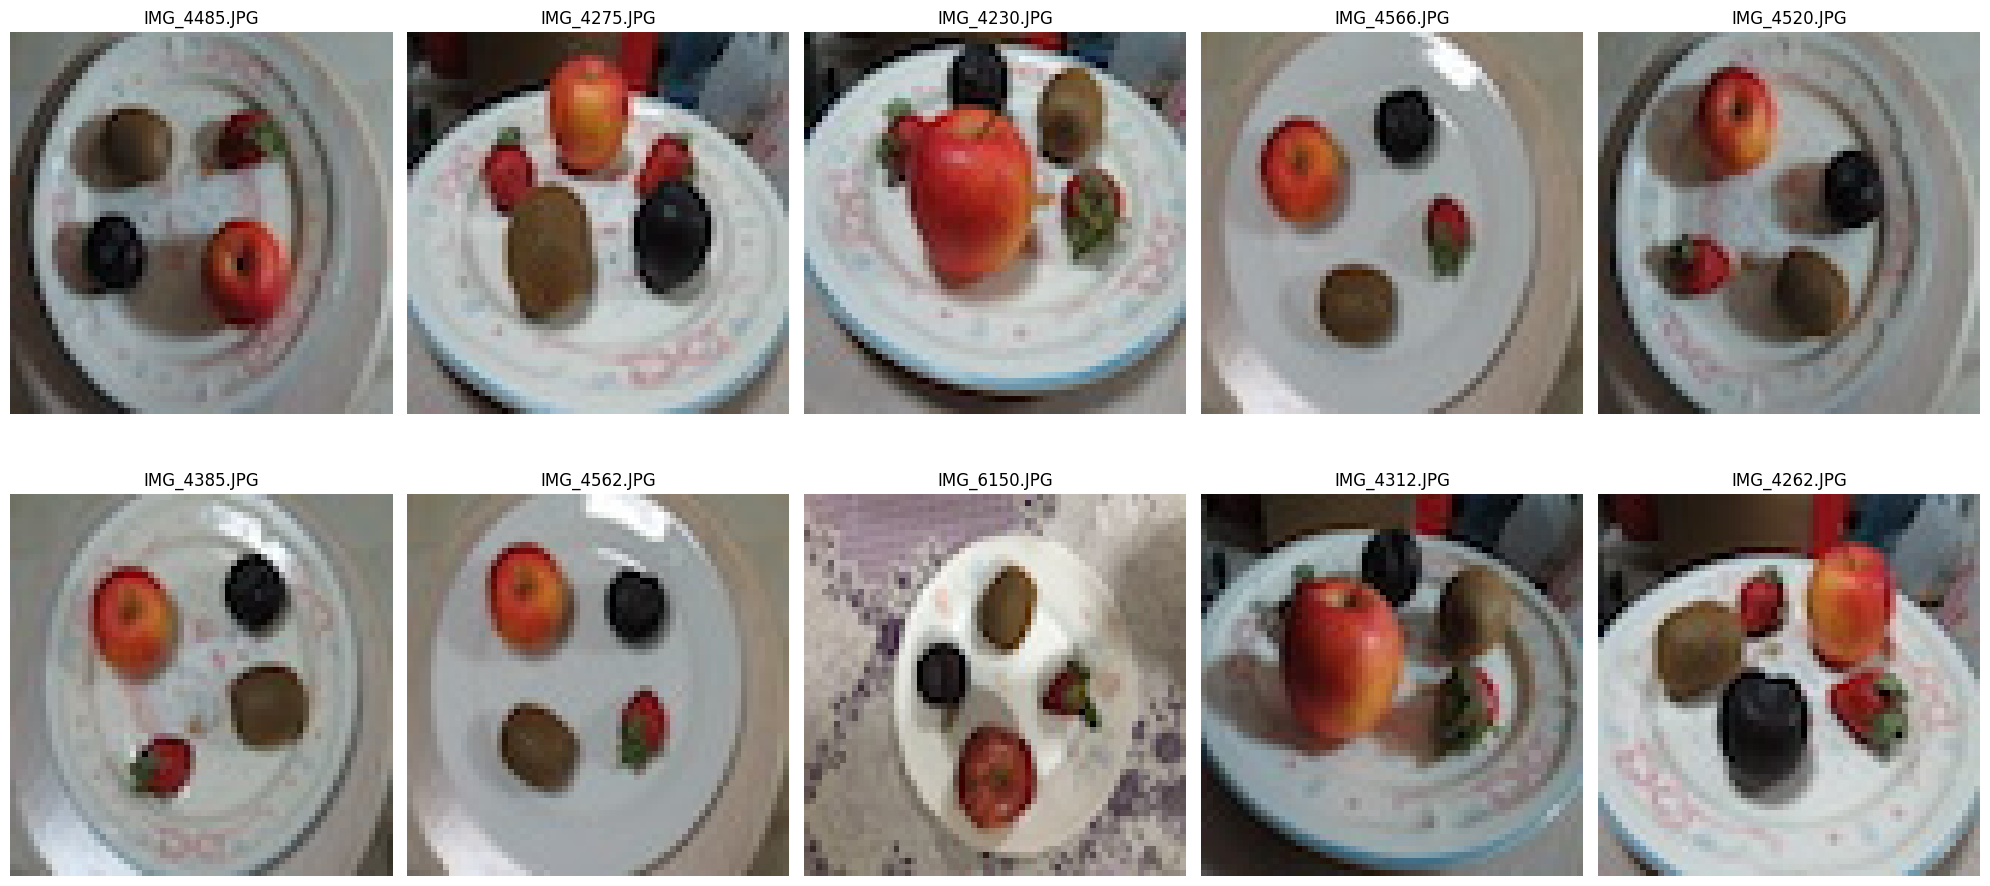

In [10]:
import matplotlib.pyplot as plt
from PIL import Image

n_images_to_display = 10
plt.figure(figsize=(20, 10))

for i, image_path in enumerate(image_files[:n_images_to_display]):
    img = Image.open(image_path)
    ax = plt.subplot(2, 5, i + 1) # Arrange images in a 2x5 grid
    ax.imshow(img)
    ax.set_title(os.path.basename(image_path))
    ax.axis('off')

plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

* The task successfully identified 102 image files within the selected folder based on common image extensions.
* 10 image files were successfully loaded and displayed in a 2x5 grid layout with their filenames as titles.

### Insights or Next Steps

* The process can be easily adapted to display a different number of images by changing the `n_images_to_display` variable.
* Further analysis could involve exploring the distribution of file types or sizes within the dataset.
